In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-out.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

season = 13
df = df[df["season"] == season]
len(df)

37615

In [2]:
def calc_vibes(df, prefix):
    buoy = df[prefix + "_buoyancy"]  # * df[prefix + "_mul"]
    press = df[prefix + "_pressurization"]  # * df[prefix + "_mul"]
    cinn = df[prefix + "_cinnamon"]  # * df[prefix + "_mul"]

    freq = 6 + (buoy * 10).round()
    phase = math.pi * ((2 / freq) * dfc["day"] + 0.5)
    vibes = 0.5 * (press + cinn) * np.sin(phase) - (0.5 * press) + (0.5 * cinn)
    return vibes


def get_pitcher_mul(row):
    pm = str(row["pitcher_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in pm:
        mul += 0.2
    if "OVERPERFORMING" in ptm:
        mul += 0.2
    if "UNDERPERFORMING" in pm:
        mul -= 0.2
    if "UNDERPERFORMING" in ptm:
        mul -= 0.2
    if "TRAVELING" in ptm:
        # pass # traveling just doesn't do anything on pitchers?
        if not row["top_of_inning"]:
            mul += 0.05
    if "HIGH_PRESSURE" in ptm:
        # i messed up baserunner_count lol, so it's a string
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "GROWTH" in ptm:
        mul += min(0.05, 0.05 * (row["day"] / 99))
        # pass # growth doesn't do anything on pitchers either
    if "SINKING_SHIP" in ptm:
        mul += (14 - row["pitching_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in ptm and row["weather"] == 11:
        mul += 0.5
    return mul


def get_batter_mul(row):
    bm = str(row["batter_mods"])
    btm = str(row["batting_team_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in bm:
        mul += 0.2
    if "OVERPERFORMING" in btm:
        mul += 0.2
    if "UNDERPERFORMING" in bm:
        mul -= 0.2
    if "UNDERPERFORMING" in btm:
        mul -= 0.2
    if "TRAVELING" in btm:
        pass
        # if row["top_of_inning"]:
        # this doesn't seem to do anything if it's here or not here
        # mul += 0.05
    if "GROWTH" in btm:
        # mul += min(0.05, 0.05 * (row["day"] / 99))
        pass
    if "HIGH_PRESSURE" in btm:
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "SINKING_SHIP" in btm:
        mul += (14 - row["batting_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in btm and row["weather"] == 11:
        mul += 0.5
    if "CHUNKY" in bm and row["weather"] == 10:
        # todo: handle, in peanuts weather
        #         pass
        mul += 1.0
    if "SMOOTH" in bm and row["weather"] == 10:
        # todo: handle, in peanuts weather
        pass
    if "ON_FIRE" in bm:
        # todo: handle
        mul += 2.0
    #         pass
    return mul


def get_fielder_mul(row):
    fm = str(row["fielder_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in fm:
        mul += 0.2
    if "OVERPERFORMING" in ptm:
        mul += 0.2
    if "UNDERPERFORMING" in fm:
        mul -= 0.2
    if "UNDERPERFORMING" in ptm:
        mul -= 0.2
    if "TRAVELING" in ptm:
        # pass # traveling just doesn't do anything on pitchers?
        if not row["top_of_inning"]:
            mul += 0.05
    if "HIGH_PRESSURE" in ptm:
        # i messed up baserunner_count lol, so it's a string
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "GROWTH" in ptm:
        mul += min(0.05, 0.05 * (row["day"] / 99))
        # pass # growth doesn't do anything on pitchers either
    if "SINKING_SHIP" in ptm:
        mul += (14 - row["pitching_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in ptm and row["weather"] == 11:
        mul += 0.5
    if "SHELLED" in fm:
        # is it this, or is it "mul = 0", I wonder
        mul -= 1.0
    return mul

In [3]:
df["batter_mul"] = df.apply(get_batter_mul, axis=1)
df["pitcher_mul"] = df.apply(get_pitcher_mul, axis=1)
df["fielder_mul"] = df.apply(get_fielder_mul, axis=1)

In [4]:
df["baserunner_n"] = [int(np.floor(len(x) / 40)) for x in df.loc[:, "baserunner_count"]]

df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0

for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_mul"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])
df = df.copy()
for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_mul"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])

if "fielder_vibes" in df:
    for attr in [
        "fielder_anticapitalism",
        "fielder_chasiness",
        "fielder_omniscience",
        "fielder_tenaciousness",
        "fielder_watchfulness",
    ]:
        df[attr] = df[attr] * df["fielder_mul"]
        df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])


df["omni_tenac"] = df["fielder_omniscience_with_vibe"] * df["fielder_tenaciousness_with_vibe"]


df["roll_minus_knowns"] = (
    df["roll"] - 0.1 * df["batter_thwackability_with_vibe"] + 0.08 * df["pitcher_unthwackability_with_vibe"]
)

df["cold_runners"] = df["pitcher_coldness_with_vibe"] * (1 + df["baserunner_n"])
df["omnisq"] = df["fielder_omniscience_with_vibe"] * df["fielder_omniscience_with_vibe"]
df["rollsq"] = df["roll"] * df["roll"]
df = df.copy()

In [5]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
# for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
for exclude_mod in ["SPICY", "ON_FIRE"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
#  dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
#  dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
#  dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]


# dfc = dfc[(dfc['pitcher_mul'] == 1) & (dfc['batter_mul'] == 1)]

# dfc = dfc[dfc['stadium_id'].isna()]

len(dfc)

36635

In [6]:
# X = dfc[['roll_minus_knowns', 'passed',
X = dfc[
    [
        "roll",
        "passed",
        "batter_thwackability_with_vibe",
        "pitcher_unthwackability_with_vibe",
        # 'pitcher_coldness_with_vibe',
        "fielder_omniscience_with_vibe",
        # 'omnisq',
        # 'baserunner_n',
        # 'cold_runners',
        # 'fielder_tenaciousness_with_vibe',
        # 'fielder_watchfulness_with_vibe',
        # 'fielder_anticapitalism_with_vibe',
        # 'fielder_chasiness_with_vibe',
        # 'fielder_roll',
        # 'omni_tenac',
        "ballpark_grandiosity",
        # 'ballpark_fortification',
        "ballpark_obtuseness",
        # 'ballpark_ominousness',
        # 'ballpark_inconvenience',
        "ballpark_viscosity",
        "ballpark_forwardness",
        # 'ballpark_elongation',
        # 'ballpark_mysticism',
        # 'ballpark_filthiness',
    ]
]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X["passed"]
X = X.drop("passed", axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, max_iter=1000000, C=1000000, tol=1e-10).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[26128     4]
 [    6 10497]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     26132
        True       1.00      1.00      1.00     10503

    accuracy                           1.00     36635
   macro avg       1.00      1.00      1.00     36635
weighted avg       1.00      1.00      1.00     36635

0.9997270369864883


In [8]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.29830562]


[(1.0, 'roll'),
 (-0.10030457646780057, 'batter_thwackability_with_vibe'),
 (0.07945330171277859, 'pitcher_unthwackability_with_vibe'),
 (0.06455897253805108, 'fielder_omniscience_with_vibe'),
 (-0.010014455162938925, 'ballpark_grandiosity'),
 (-0.009889217717369796, 'ballpark_forwardness'),
 (-0.007484546588946438, 'ballpark_obtuseness'),
 (0.0020612678358678488, 'ballpark_viscosity')]

## Best formulas so far

[0.29830562]
(0.10030457646780057, 'batter_thwackability_with_vibe')
(-0.07945330171277859, 'pitcher_unthwackability_with_vibe')
(-0.06455897253805108, 'fielder_omniscience_with_vibe')
(0.010014455162938925, 'ballpark_grandiosity')
(0.007484546588946438, 'ballpark_obtuseness')
(-0.0020612678358678488, 'ballpark_viscosity')
(0.009889217717369796, 'ballpark_forwardness')


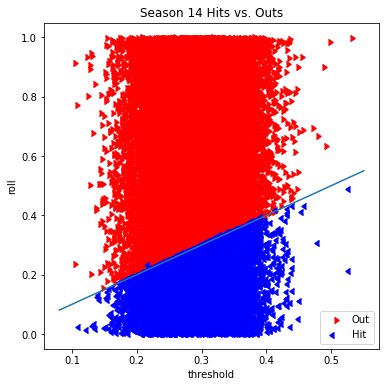

In [9]:
dfc["threshold"] = 0.315 - (
    -0.10 * dfc["batter_thwackability_with_vibe"]
    + 0.08 * dfc["pitcher_unthwackability_with_vibe"]
    + 0.07 * dfc["fielder_omniscience_with_vibe"]
)  # this works for season 12 and 13 without ballparks

dfc["threshold"] = 0.300 - (
    -0.10 * dfc["batter_thwackability_with_vibe"]
    + 0.080 * dfc["pitcher_unthwackability_with_vibe"]
    + 0.065 * dfc["fielder_omniscience_with_vibe"]
    - 0.0115 * dfc["ballpark_grandiosity"]
    - 0.008 * dfc["ballpark_obtuseness"]
    - 0.007 * dfc["ballpark_forwardness"]
    + 0.0032 * dfc["ballpark_viscosity"]
)  # this almost works, for season 14 and 15

# this will use the fit values
dfc["threshold"] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll":
        print(pair)
        dfc["threshold"] += pair[0] * dfc[pair[1]]


y_val = "roll"
x_val = "threshold"
# x_val = "fielder_roll"
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]][y_val],
    color="red",
    label="Out",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]][y_val],
    color="blue",
    label="Hit",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title(f"Season {season+1} Hits vs. Outs")
# ax.set_xlim(0.484, 0.499)

if x_val == "threshold":
    ax.plot(ax.get_xlim(), ax.get_xlim())

ax.legend()

10


,offset,event_type,pitcher_mul,batter_mul,fielder_mul,event_type,roll,threshold,batter_thwackability_with_vibe,pitcher_unthwackability_with_vibe,fielder_omniscience_with_vibe,batter_name,pitcher_name,fielder_name,batter_mods,pitcher_mods,fielder_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count,fielder_roll,ballpark_obtuseness
78989,0.015281,BaseHit,1.5,1.0,1.5,BaseHit,0.233571,0.218291,0.720966,1.459366,0.766728,Kline Greenlemon,Doc Anice,Yusef Puddles,NaN,TRIPLE_THREAT,NaN,NaN,AFFINITY_FOR_CROWS,17,609df474-4139-4797-96f5-d05876244cd8,153,0.818188,0.473072
83743,0.003960,BaseHit,1.5,1.0,1.5,BaseHit,0.334805,0.330845,0.884810,0.577147,0.422816,Washer Barajas,Henry Marshallow,Jode Preston,NaN,NaN,NaN,O_NO,AFFINITY_FOR_CROWS,102,bbd5d4d2-c0a4-48f3-a6db-d66874e77da3,218,0.978016,0.626709
79660,0.000606,BaseHit,1.0,1.0,1.0,BaseHit,0.416892,0.416286,1.188577,0.139287,0.106464,Jacob Haynes,Karato Bean,Stew Briggs,NaN,NaN,REPEATING;WANDERER,GROWTH,NaN,18,5bcae88a-3fbc-420e-956a-1fd34f6d0a30,186,0.960727,0.745675
64853,0.000238,BaseHit,1.0,1.0,1.0,BaseHit,0.342717,0.342480,0.716318,0.456895,0.125072,Zion Aliciakeyes,Sosa Hayes,Stew Briggs,SWIM_BLADDER,NaN,REPEATING;WANDERER,FIREPROOF;SEALANT;AMBUSH,NaN,86,0114739e-8e98-4e4f-b387-52ad0a60c9fa,191,0.932112,0.745675
80378,0.000183,BaseHit,1.0,1.0,1.0,BaseHit,0.380452,0.380269,0.957901,0.281600,0.052792,Eduardo Woodman,Jolene Willowtree,Kelvin Drumsolo,NaN,NaN,NaN,AFFINITY_FOR_CROWS,MAINTENANCE_MODE,19,59e83fde-7fc2-4b8c-a77a-aa0a32ae9101,267,0.466739,0.452160
82765,0.000138,BaseHit,1.0,1.0,1.0,BaseHit,0.313900,0.313762,0.717600,0.451308,0.587668,Herring Winfield,PolkaDot Zavala,Jessica Telephone,NaN,NaN,SUPERALLERGIC;HONEY_ROASTED;EGO1,TRAVELING,NaN,23,ebfccb55-d3bd-4e22-b9ab-b719aaacc0dc,247,0.306774,0.767839
68499,-0.000034,GroundOut,1.0,1.0,1.0,GroundOut,0.314552,0.314586,1.074833,0.929474,0.533838,Jode Preston,Fynn Doyle,Andrew Solis,NaN,ALTERNATE,FIRE_EATER,AFFINITY_FOR_CROWS,BIRD_SEED;PARTY_TIME,92,183482cf-777a-438d-bf61-31cb6256f22e,108,0.564496,0.763673
73681,-0.000314,GroundOut,1.0,1.0,1.0,GroundOut,0.323189,0.323504,1.207072,0.766287,0.721207,Knight Triumphant,Tot Clark,Malik Destiny,SIPHON;PERK,NaN,ALTERNATE;FIRE_EATER,LOVE,NaN,9,68bf182a-53c4-4f41-8b4c-28b2e0326125,19,0.343765,0.440767
82213,-0.000359,GroundOut,1.0,1.0,1.0,GroundOut,0.269915,0.270273,0.463527,1.009648,0.142414,Summers Pony,Inky Rutledge,Eizabeth Elliott,NaN,TRIPLE_THREAT,NaN,NaN,O_NO,22,76795bae-2e33-4e19-9082-0b3bf6965b6b,310,0.999097,0.546283
74802,-0.000642,GroundOut,1.2,1.0,1.2,GroundOut,0.199549,0.200191,0.449987,1.104450,1.047191,Inez Owens,Walton Sports,Campos Arias,ALTERNATE,FRIEND_OF_CROWS,ALTERNATE,GROWTH,OVERPERFORMING;EARLBIRDS,10,6c26ff07-f187-4c4e-9fa7-864fa67369d1,237,0.251630,0.437936


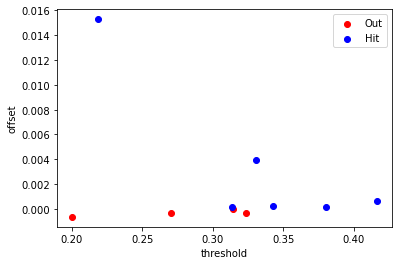

In [10]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "threshold"
# x_val = "pitcher_unthwackability_with_vibe"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="Out",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Hit",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
table = outliers[
    [
        "offset",
        "event_type",  # "home_score", "away_score", "top_of_inning", "inning",
        "pitcher_mul",
        "batter_mul",
        "fielder_mul",  # "baserunner_count",
        "event_type",
        "roll",
        "threshold",  # "batter_vibes", "pitcher_vibes",
        "batter_thwackability_with_vibe",
        "pitcher_unthwackability_with_vibe",
        "fielder_omniscience_with_vibe",
        "batter_name",
        "pitcher_name",
        "fielder_name",
        "batter_mods",
        "pitcher_mods",
        "fielder_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "day",
        "game_id",
        "play_count",
        "fielder_roll",
        "ballpark_obtuseness",
    ]
]
print(len(table))
table.sort_values("offset", ascending=False)[0:10]

In [11]:
# outliers.sort_values('roll', ascending=True).style.hide()
dfc.groupby("fielder_name").size().sort_values(ascending=False)[0:15]

fielder_name
Halexandrey Walton    328
Basilio Fig           297
Yusef Puddles         295
Basilio Mason         278
Eduardo Woodman       273
Valentine Games       271
Jode Preston          264
Sigmund Castillo      230
Huber Frumple         228
Nagomi Nava           228
Marquez Clark         223
Kaj Statter Jr.       221
Kennedy Loser         221
Nicholas Mora         217
Richmond Harrison     216
dtype: int64

In [12]:
dfc.corr()["offset"].sort_values()[0:10]

passed                           -0.780808
threshold                        -0.162845
batter_thwackability_with_vibe   -0.111318
batter_thwackability             -0.107602
batter_musclitude_with_vibe      -0.043729
batter_musclitude                -0.039269
batter_overpowerment_with_vibe   -0.038237
batter_overpowerment             -0.034199
batter_coldness_with_vibe        -0.032661
batter_buoyancy_with_vibe        -0.030218
Name: offset, dtype: float64

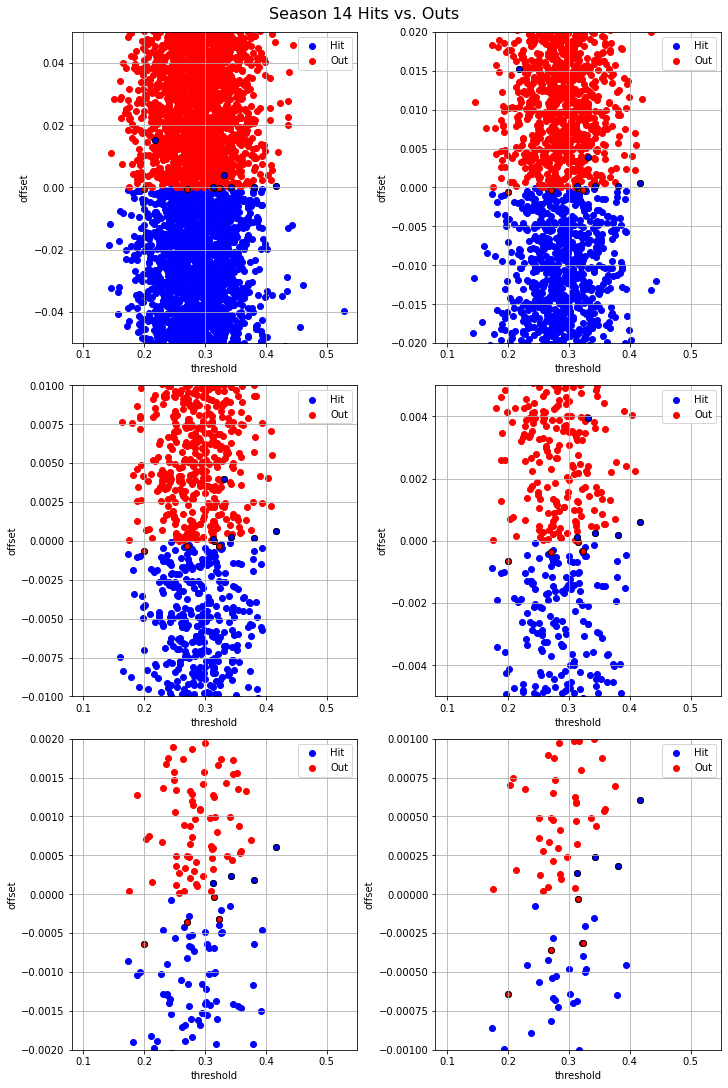

In [13]:
plt.rcParams["font.size"] = 10
x_val = "threshold"
fig, axes = plt.subplots(3, 2, figsize=(10, 15), constrained_layout=True)
fig.suptitle(f"Season {season+1} Hits vs. Outs", fontsize=16)
dimlist = [5e-2, 2e-2, 1e-2, 0.5e-2, 0.2e-2, 0.1e-2]
for i, ax in enumerate(np.ravel(axes)):
    ax.scatter(
        dfc[dfc["passed"]][x_val],
        dfc[dfc["passed"]]["offset"],
        color="blue",
        label="Hit",
    )
    ax.scatter(
        dfc[~dfc["passed"]][x_val],
        dfc[~dfc["passed"]]["offset"],
        color="red",
        label="Out",
    )
    ax.scatter(
        outliers[~outliers["passed"]][x_val],
        outliers[~outliers["passed"]]["offset"],
        color="red",
        edgecolor="black",
    )
    ax.scatter(
        outliers[outliers["passed"]][x_val],
        outliers[outliers["passed"]]["offset"],
        color="blue",
        edgecolor="black",
    )
    ax.set_xlabel(x_val)
    ax.set_ylabel("offset")
    ax.legend()
    ax.grid()
    ax.set_ylim(-dimlist[i], dimlist[i])
# fig.savefig("hit_out_fit_offsets.png", facecolor='white')

In [14]:
dfc.groupby("baserunner_count").size().sort_values(ascending=False)[0:15]

baserunner_count
[]                                          24361
['03b80a57-77ea-4913-9be4-7a85c3594745']      106
['efafe75e-2f00-4418-914c-9b6675d39264']       97
['17392be2-7344-48a0-b4db-8a040a7fb532']       91
['c675fcdf-6117-49a6-ac32-99a89a3a88aa']       88
['2ffbaec8-a646-4435-a17a-3a0a2b5f3e16']       86
['c755efce-d04d-4e00-b5c1-d801070d3808']       86
['32810dca-825c-4dbc-8b65-0702794c424e']       80
['88cd6efa-dbf2-4309-aabe-ec1d6f21f98a']       79
['9a031b9a-16f8-4165-a468-5d0e28a81151']       79
['083d09d4-7ed3-4100-b021-8fbe30dd43e8']       77
['27c68d7f-5e40-4afa-8b6f-9df47b79e7dd']       75
['ac69dba3-6225-4afd-ab4b-23fc78f730fb']       75
['114100a4-1bf7-4433-b304-6aad75904055']       73
['27839754-c351-43ec-9bff-ca662a2385b9']       72
dtype: int64

In [15]:
max(len(x) for x in dfc.loc[:, "baserunner_count"])

120

In [16]:
dfc.groupby("stadium_id").size()

stadium_id
031670ae-97a5-4215-b1a1-98e9f1de7c50    1174
06c991f6-4ef3-4a9a-8254-8a2bc7d3a1e1    1708
1c1614b3-abdb-4008-98eb-12aeb8f7bb54    1383
21ce1233-b2d6-4bd2-8d03-68a8915afdc5    1316
2841dc8c-b5a2-4b3a-a717-9e646e8e29fc    1672
2a1a52b3-9759-44aa-ba49-b1437396d895    2175
36ae955c-6264-4437-8669-3053f62992e5    1646
36b94380-39a6-4e32-b525-3e888215798a    2809
37c2743f-1a15-4e3f-bdb1-a6461df93434    1506
43fbdf41-336f-46a8-9445-eb8a6e05d811    1657
60e78a6c-fe49-4283-8293-735e9fa7e3e9    1219
6bfd22e7-831d-4ba9-a9f9-2cf7ab00c39d    1610
7f09624b-b3cf-4493-b768-adf090bebf21    1735
8a84154e-80d7-47d5-8f56-295e9a9653d9    1176
8e900d85-7d4c-47d0-a67f-6432144f0210    1360
929fc650-948a-4736-b7a2-bb7b75902e6e    1115
a0851e18-d5d7-4749-b3c5-c6023fe1cc61    1599
a109bd65-bfd3-43c7-9eb8-70dddc4d8a29    1368
ba794e99-4d6b-4e12-9450-6522745190f8    1203
cb94ac8b-003b-4d95-baf3-7c14b1c3fc29     960
cfb57d7c-4118-4b0a-85cc-4e3a51a66cb6    1439
d37abba6-9fba-463a-8f4f-7cf49de3c7b6    1113